# Data Linkage , And Linkage Key Generation

Please run [Record-Linkage-Example.ipynb](Record-Linkage-Example.ipynb) before this one in order to get the trained model and data.

## Dataset

In [92]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /home/japan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/japan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/japan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Test Data

In [93]:
df6=pd.read_csv(r"/home/japan/AMIT KUMAR/DC/Data/RRUFF_Export_20230608_052338.csv", encoding='latin-1')
df6

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014,Approved,Not in a structural group,Â,"IbÃ¡Ã±ez-Insa J, Elvira J J, Llovet X, PÃ©rez-...",hexagonal,P31c|P6_3mc,370.0,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975,Approved,Not in a structural group,Â,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,P-1,56.0,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991,Approved,Not in a structural group,Â,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,R-3,124.0,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4Â·3H2O,K(UO2)(AsO4)Â·3H2O,K U O As H,NaN,NaN,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,P4/nmm|P4/ncc,358.9,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983,Approved,Not in a structural group,Â,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,R32,0.0,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,ZvÄstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,IMA2020-061,NaN,Czech Republic,2020,Approved,Tetrahedrite,Â,"Sejkora J, Biagioni C, VrtiÅ¡ka L, MoÃ«lo Y (2...",cubic,I-43m,NaN,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,IMA2013-071,NaN,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,Â,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,P-1,370.0,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,IMA1966-006,NaN,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, MuravÂ´eva I V, Troneva N V (1966)...",cubic,Pm3m,3100.0,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,NaN,R050279,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,I2/a,1820.0,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."


In [94]:
df1 = df6.loc[:, ['Mineral Name', 'Chemistry Elements','Year First Published']]
df2 = df6.loc[:, ['RRUFF Chemistry (plain)', 'RRUFF IDs','Country of Type Locality']]
df3 = df6.loc[:, ['IMA Chemistry (plain)', 'IMA Number']]
df4 = df6.loc[:, ['Structural Groupname', 'Crystal Systems','IMA Status']]
df5 = df6.loc[:, ['Status Notes', 'Fleischers Groupname','Space Groups']]
df6 = df6.loc[:, ['Oldest Known Age (Ma)', 'Valence Elements','Paragenetic Modes']]

In [95]:
df1

,Mineral Name,Chemistry Elements,Year First Published
0,Abellaite,Na Pb C O H,2014
1,Abelsonite,Ni C H N,1975
2,Abenakiite-(Ce),Na Ce Si O P C S,1991
3,Abernathyite,K U O As H,1956
4,Abhurite,Sn O H Cl,1983
...,...,...,...
5899,ZvÄstovite-(Zn),Ag Zn As S,2020
5900,Zvyaginite,Na Zn Ti Nb Si O H,2013
5901,Zvyagintsevite,Pd Pb,1966
5902,Zwieselite,Fe P O F,1841


In [96]:
df2

,RRUFF Chemistry (plain),RRUFF IDs,Country of Type Locality
0,NaPb2+2(CO3)2(OH),NaN,Spain
1,Ni2+C31H32N4,R070007,USA
2,Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,NaN,Canada
3,K(U6+O2)As5+O4Â·3H2O,NaN,USA
4,Sn2+21O6(OH)14Cl16,R060227,Saudi Arabia
...,...,...,...
5899,Ag1+6(Ag1+4Zn2+2)As3+4S2-13,NaN,Czech Republic
5900,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,NaN,Russia
5901,Pd3Pb,NaN,Russia
5902,Fe2+2PO4F,R050279,Germany


In [97]:
df3

,IMA Chemistry (plain),IMA Number
0,NaPb2(CO3)2(OH),IMA2014-111
1,NiC31H32N4,IMA1975-013
2,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,IMA1991-054
3,K(UO2)(AsO4)Â·3H2O,NaN
4,Sn2+21O6(OH)14Cl16,IMA1983-061
...,...,...
5899,Ag6(Ag4Zn2)As4S13,IMA2020-061
5900,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,IMA2013-071
5901,Pd3Pb,IMA1966-006
5902,Fe2+2(PO4)F,NaN


In [98]:
print(df6.shape)
df6.head()

(5904, 3)


,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,370.0,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,56.0,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,124.0,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,358.9,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,0.0,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."


Oldest Known Age (Ma)
413.600000     152
0.000000       122
0.000036       120
2500.000000    108
4000.000000    105
              ... 
942.000000       1
2845.000000      1
259.000000       1
153.000000       1
685.000000       1
Name: count, Length: 652, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Oldest Known Age (Ma)', ylabel='count'>

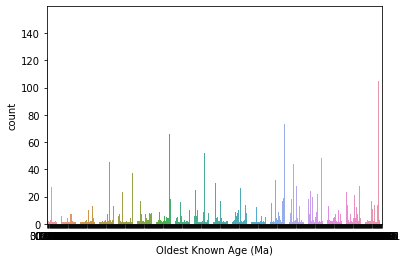

In [99]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
x=df6['Oldest Known Age (Ma)'].value_counts()
print(x)
sns.barplot(x.index,x)

In [100]:
df6.isna().sum()

Oldest Known Age (Ma)    1080
Valence Elements            0
Paragenetic Modes          59
dtype: int64